In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from langchain_core.messages import BaseMessage,HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [2]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):
    
    messages : Annotated[list[BaseMessage],add_messages]

In [3]:
from email import message

llm = ChatOpenAI()

def chat_node(state:ChatState):
    
    # take user query from state
    messages = state['messages']
    
    # send to llm
    response = llm.invoke(messages)
    
    # response store state
    return {'messages':response}

In [5]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node',chat_node)

graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

chatbot = graph.compile(checkpointer=checkpointer)

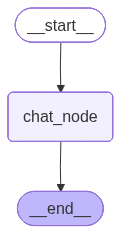

In [6]:
chatbot

In [9]:
initial_state = {
    'messages':[HumanMessage(content = 'What is the capital of india')]    
}

chatbot.invoke(initial_state)

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [8]:
from logging import config


thread_id = '1'
while True:
    
    user_message = input('Type here: ')
    
    print('User', user_message)
    
    if user_message.strip().lower() in ['exit','quit','bye']:
        break
    
    config = {'configurable':{'thread_id':thread_id}}
    response = chatbot.invoke({'messages':[HumanMessage(content = user_message)]},config=config)
    
    print('AI:',response['messages'][-1].content)

User 
AI: Hello! How can I assist you today?
User hi
AI: Hello! How can I help you today?
User i am feeling tired
AI: I'm sorry to hear that. Is there anything specific that is making you feel tired, or have you been overworking yourself lately? Make sure to rest and take care of yourself. If you need any tips for boosting your energy levels, feel free to ask.
User can you proivde a recipe to rehydrate myself
AI: Certainly! Here is a simple recipe for a natural electrolyte drink that can help rehydrate you:

Ingredients:
- 2 cups of coconut water (for hydration and electrolytes)
- 1/2 cup of freshly squeezed orange juice (for vitamin C)
- 1/4 teaspoon of sea salt (for additional electrolytes)
- 1 tablespoon of honey or maple syrup (for sweetness and energy)

Instructions:
1. Mix all the ingredients together in a large glass or pitcher.
2. Stir well until the honey or maple syrup is fully dissolved.
3. Drink the electrolyte drink slowly to help rehydrate your body.

This natural electro

In [10]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='ce4e6dac-3342-4136-a02b-aa54b3578155'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 7, 'total_tokens': 16, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-D3IP6euKM9ty5zDmkbmbqwi4Z5ucV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c0908-df3c-7f33-9155-c0e9e9db756a-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details':